Firstly import tensorflow and basic supporting libraries

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

import dataset from keras and splitting the data into training and testing dataset 60000 images of 10 different categories in training dataset, 10000 images in testing dataset

It is advisable to normalise the data before we move further for training the model.

we know that each pixal is represented by a number in a matrix in the range of 0-255; black-white. By dividing 255, we could transform it in the range of 0-1. This would save time while training and could improve the model performance.

The labels are in number, thus we need to assign the class name to each number 0-9. Total 10 classes

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

using Matplotlib lets see the 22nd image

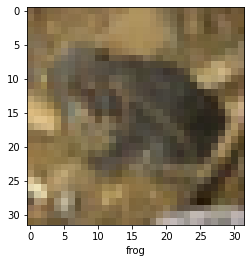

In [15]:
IMG_INDEX = 23
plt.imshow(train_images[IMG_INDEX])
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

After normalising the data, start building the neural network. Layers

The input shape 32, 32, 3 and we will process 32 filters of size 3x3 on input data with activation function relu to the output of each convolution operation.
This layer will perform the max pooling operation using 2x2 samples and a stride of 2; reducing our matrix by two stride shifts
Again process 32 filters of size 3x3 on input data with activation function relu to the output of each convolution operation. 4,5 repeated the layers.

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Now have a look at the network we built

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


After completeing the convolutional base exact the features. Layers

first flatten the matrix and make data in a single data vector
hidden layer with activation method Rectified Linear Unit
output layer with activation method softmax (gives probability distribution of classes) have a look at final Network

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

Hyper-parameter tuning for the nural network model to optimise our neural network use Adam; an algorithm for gradient-based optimization of stochastic objective function.It is computationally efficient and requires little memory. To calculate the loss in every new model use sparse_categorical_crossentropy; it is the categorical cross entropy. Sparse means that it does use all the possible classes but some of them. This is useful when you have more classes, where softmax would be a very slow function and imrovement we want is accuracy.

train the model on training data with 6 iterations

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, validation_split = 0.1, epochs=6)

Train on 45000 samples, validate on 5000 samples
Epoch 1/6
45000/45000 [==============================] - 34s 749us/sample - loss: 1.5568 - accuracy: 0.4313 - val_loss: 1.2603 - val_accuracy: 0.5486
Epoch 2/6
45000/45000 [==============================] - 33s 731us/sample - loss: 1.2072 - accuracy: 0.5700 - val_loss: 1.1361 - val_accuracy: 0.5870
Epoch 3/6
45000/45000 [==============================] - 33s 727us/sample - loss: 1.0580 - accuracy: 0.6261 - val_loss: 1.0015 - val_accuracy: 0.6450
Epoch 4/6
45000/45000 [==============================] - 33s 744us/sample - loss: 0.9608 - accuracy: 0.6638 - val_loss: 0.9344 - val_accuracy: 0.6712
Epoch 5/6
45000/45000 [==============================] - 34s 760us/sample - loss: 0.8863 - accuracy: 0.6886 - val_loss: 0.8805 - val_accuracy: 0.6966
Epoch 6/6
45000/45000 [==============================] - 35s 789us/sample - loss: 0.8242 - accuracy: 0.7118 - val_loss: 0.9061 - val_accuracy: 0.6840


check the model performance on testing data

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)
print(test_acc)

10000/10000 [==============================] - 4s 357us/sample - loss: 0.9361 - accuracy: 0.6717
0.6717


prediction on test data

In [12]:
predictions = model.predict(test_images)

check the results with model predition with the facts for desired picture number.

In [13]:
def show_prediction(img):
    i=img
    plt.figure()
    plt.imshow(test_images[i])
    plt.show()
    print("the prediction is",class_names[np.argmax(predictions[i])]+" and real picture is of ",class_names[np.int(test_labels[i])]) 

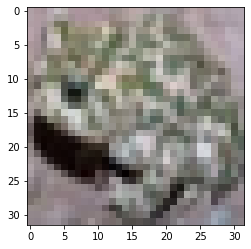

the prediction is frog and real picture is of  frog


In [20]:
show_prediction(3888)